In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("C:\Dataset\kuliah_KKPM\data.txt", sep=',',header=None)
X=data[0]
Y=data[1]
m=Y.size

In [3]:
def plotData(x,y):
    fig = pyplot.figure()
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Y')
    pyplot.xlabel('X')
    pyplot.show()

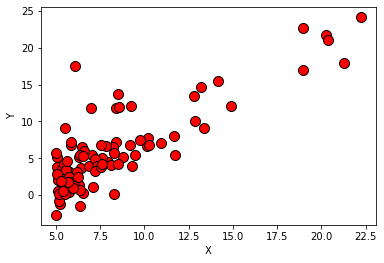

In [4]:
plotData(X,Y)

In [5]:
# ubah dimensi X jadi (97,2)
X = np.stack([np.ones(m), X], axis=1)

In [6]:
def costFunction(x, y, theta):
    m = Y.size
    J = 0
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y)) # compute cost using the a
    return J

In [7]:
# trying with a particular values of theta
J = costFunction(X, Y, theta=np.array([0, 0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)

With theta = [0, 0] 
Cost computed = 32.07


In [8]:
 J = costFunction(X, Y, theta=np.array([-2, 4]))
print('With theta = [-2, 4] \nCost computed = %.2f' % J)

With theta = [-2, 4] 
Cost computed = 370.39


In [9]:
def gradientDescent(x, y, theta, alpha, num_iters):
    J_history=[] # history of loss fuction data 
    for i in range(0,num_iters):
        J=costFunction(x,y,theta)
        J_history.append(J)
        for j in range(0,2): # update nilai theta secara simultan 
            theta[j]=theta[j]-alpha*(1/m)*np.sum((np.dot(x,theta)-y)*X[:,j])        
    return theta,J_history

In [10]:
theta = np.zeros(2) #initialize the values of theta
iterations = 1000 # iterations to find the optimal theta
alpha = 0.001 # learning rate
theta, J_history = gradientDescent(X ,Y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))

Theta found by gradient descent: -0.5765, 0.8596


Text(0.5, 0, 'Population')

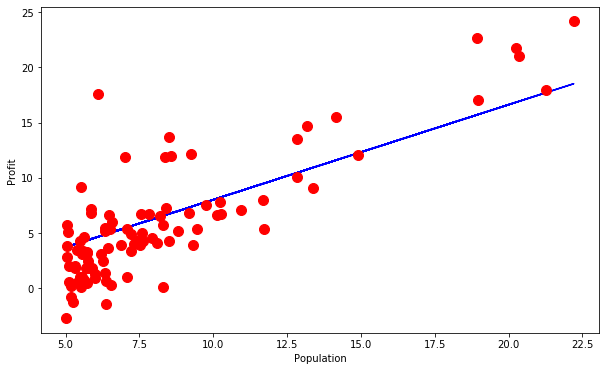

In [14]:
# plot garis linear regression

plt.figure(figsize=(10,6))
y_prediction=theta[0]+theta[1]*X[:,1]
plt.plot(X[:,1],y_prediction,'-b',markersize=10)
plt.plot(X[:,1],Y,'ro',markersize=10)
plt.ylabel('Profit')
plt.xlabel('Population')